In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.5.4 NCI60 Data Example
NCI60 cancer cell line microarray data, 6,830 gene expression measurements on 64 cancer cell lines.

In [2]:
# The NCI60 data
data = pd.read_csv("data/NCI60_x.csv", index_col = 0)
labels = pd.read_csv("data/NCI60_y.csv", index_col = 0)

data.shape

(64, 6830)

Each cell line is labeled with a cancer type. We'll ignore the
cancer types in performing clustering, as these are unsupervised
techniques. After performing clustering, we'll use this column to see the extent to which these cancer types agree with the results of these
unsupervised techniques.

The data has 64 rows and 6,830 columns.

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [4]:
labels.head()

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


In [5]:
#  cancer types for the cell lines:
labels['x'].value_counts(sort=True)

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: x, dtype: int64

In [6]:
# assign integers to string labels
from sklearn import preprocessing
labels['int'] = preprocessing.LabelEncoder().fit_transform(labels['x'])
labels

,x,int
1,CNS,1
2,CNS,1
3,CNS,1
4,RENAL,12
5,BREAST,0
...,...,...
60,MELANOMA,8
61,MELANOMA,8
62,MELANOMA,8
63,MELANOMA,8


## PCA

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [8]:
pca = make_pipeline(StandardScaler(), PCA(n_components=64))

# X = df[feature_names]
XX = pca.fit_transform(data)

XX.shape

(64, 64)

Text(0, 0.5, 'cumulative PVE')

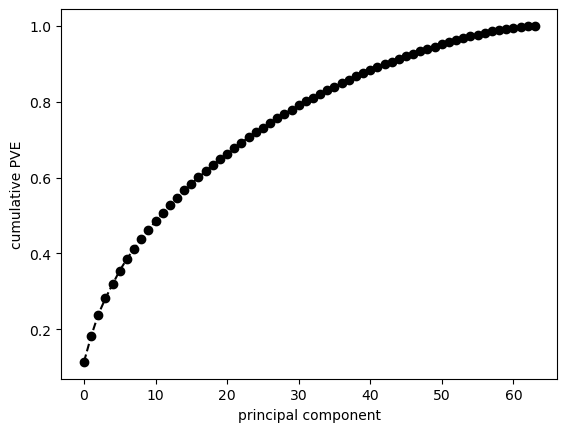

In [9]:
plt.plot(np.cumsum(pca['pca'].explained_variance_ratio_), 'o--k')
plt.xlabel('principal component')
plt.ylabel('cumulative PVE')

Text(0, 0.5, 'X2')

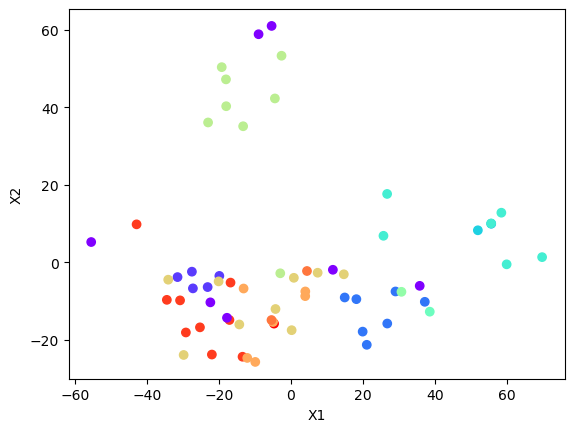

In [10]:
plt.scatter(XX[:,0], XX[:,1], c=labels['int'], cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X3')

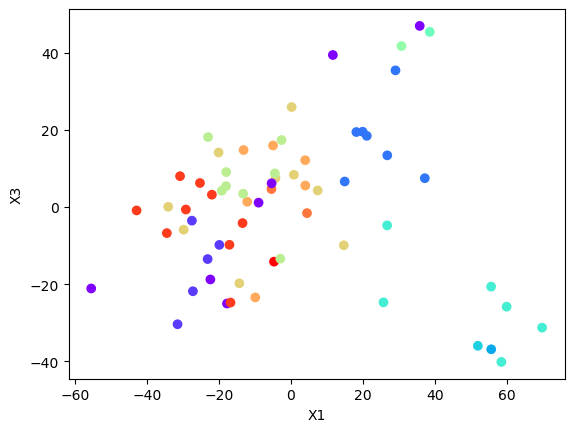

In [11]:
plt.scatter(XX[:,0], XX[:,2], c=labels['int'], cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X3')

## Clustering

We now perform hierarchical clustering of the observations using complete,
single, and average linkage. We'll use standard Euclidean distance as the dissimilarity
measure:

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [13]:
# code from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0, 0.5, 'distance')

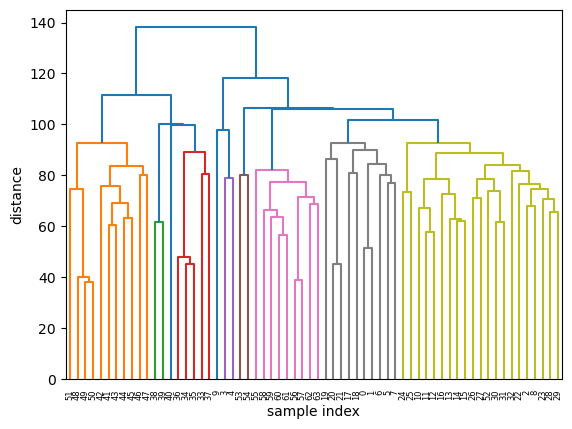

In [14]:
# hierarchical clustering with complete linkage
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None).fit(data)

plot_dendrogram(clustering, truncate_mode="level", p=20)
plt.xlabel('sample index')
plt.ylabel('distance')

Text(0, 0.5, 'distance')

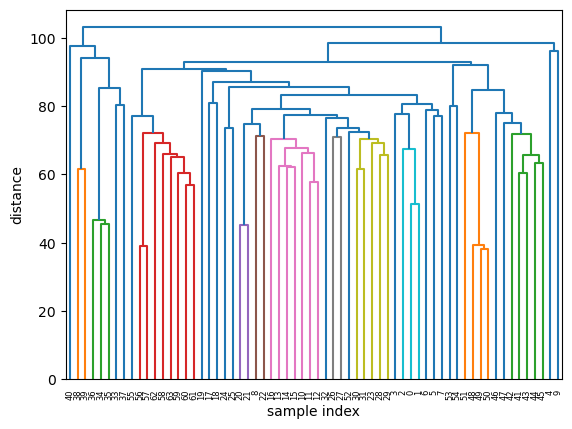

In [15]:
# hierarchical clustering with average linkage
clustering = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None).fit(data)

plot_dendrogram(clustering, truncate_mode="level", p=20)
plt.xlabel('sample index')
plt.ylabel('distance')

Text(0, 0.5, 'distance')

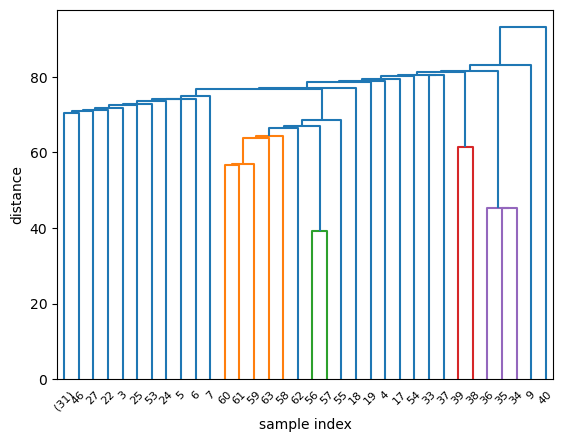

In [16]:
# hierarchical clustering with single linkage
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None).fit(data)

plot_dendrogram(clustering, truncate_mode="level", p=20)
plt.xlabel('sample index')
plt.ylabel('distance')